# Assignment: Data Wrangling
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [15]:
!git clone https://github.com/damiayandipo/wrangling.git


import os
import pandas as pd
import numpy as np

print("📍 Current location:", os.getcwd())


if os.path.exists('wrangling'):
    print("\n📁 Found 'wrangling' folder")

    print("📄 Files in 'wrangling' folder:")
    for file in os.listdir('wrangling'):
        print(f"  - {file}")


    dataframes = {}

    try:

        airbnb_path = os.path.join('wrangling', 'airbnb_hw.csv')
        if os.path.exists(airbnb_path):
            df_airbnb = pd.read_csv(airbnb_path)
            dataframes['airbnb'] = df_airbnb
            print(f"\n✅ Loaded Airbnb: {df_airbnb.shape}")


        police_path = os.path.join('wrangling', 'mn_police_use_of_force.csv')
        if os.path.exists(police_path):
            df_police = pd.read_csv(police_path)
            dataframes['police'] = df_police
            print(f"✅ Loaded Police: {df_police.shape}")


        justice_files = ['justice_data.parquet', 'pretrial_data.csv', 'justice.csv']
        for file in justice_files:
            path = os.path.join('wrangling', file)
            if os.path.exists(path):
                if file.endswith('.parquet'):
                    df_pretrial = pd.read_parquet(path)
                else:
                    df_pretrial = pd.read_csv(path)
                dataframes['pretrial'] = df_pretrial
                print(f"✅ Loaded Pretrial ({file}): {df_pretrial.shape}")
                break

    except Exception as e:
        print(f"❌ Error: {e}")

else:
    print("❌ 'wrangling' folder not found in current location")

    # Try going up one level
    print("\n🔍 Trying parent directory...")
    os.chdir('..')  # Go up one level
    print("📍 Now at:", os.getcwd())

    if os.path.exists('wrangling'):
        print("✅ Found 'wrangling' folder!")

fatal: destination path 'wrangling' already exists and is not an empty directory.
📍 Current location: /content

📁 Found 'wrangling' folder
📄 Files in 'wrangling' folder:
  - wrangling_mod.slides.html
  - .git
  - data
  - src
  - README.md
  - wrangling_mod.ipynb
  - assignment
  - lab


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [64]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv('wrangling/assignment/data/airbnb_hw.csv')

In [65]:
#part 1
airbnb = pd.read_csv('wrangling/assignment/data/airbnb_hw.csv')
price_col = [col for col in airbnb.columns if 'price' in col.lower()][0]
airbnb['Price_clean'] = airbnb[price_col].astype(str).str.replace('$', '').str.replace(',', '')
airbnb['Price_clean'] = pd.to_numeric(airbnb['Price_clean'], errors='coerce')
missing_airbnb = airbnb['Price_clean'].isna().sum()
print(f"PART 1 - Airbnb missing: {missing_airbnb}")

#part 2
police = pd.read_csv('wrangling/assignment/data/mn_police_use_of_force.csv')
injury_col = [col for col in police.columns if 'injury' in col.lower()][0]
force_col = [col for col in police.columns if 'force' in col.lower() and 'type' in col.lower()][0]
police['injury_clean'] = police[injury_col].astype(str).str.upper().replace({'YES':'Yes','Y':'Yes','NO':'No','N':'No'})
police.loc[~police['injury_clean'].isin(['Yes','No']), 'injury_clean'] = np.nan
missing_police = police['injury_clean'].isna().sum()
missing_pct = (missing_police/len(police))*100
print(f"PART 2 - Missing: {missing_pct:.1f}%")
cross_tab = pd.crosstab(police[force_col], police['injury_clean'])
print("Cross-tab first 5 rows:")
print(cross_tab.head())
#part 3
pretrial = pd.read_parquet('wrangling/assignment/data/justice_data.parquet')  # Corrected file for pretrial data
release_col = [col for col in pretrial.columns if 'release' in col.lower()][0]
pretrial['release_clean'] = pretrial[release_col].astype(str).str.upper().replace({
    'YES':True,'Y':True,'TRUE':True,'NO':False,'N':False,'FALSE':False
})
pretrial.loc[~pretrial['release_clean'].isin([True,False]), 'release_clean'] = np.nan
print(f"PART 3 - Released: {(pretrial['release_clean']==True).sum()}, Not released: {(pretrial['release_clean']==False).sum()}, Missing: {pretrial['release_clean'].isna().sum()}")
#part 4
sentence_col = [col for col in pretrial.columns if 'sentence' in col.lower() and 'imposed' in col.lower()][0]
type_col = [col for col in pretrial.columns if 'sentence' in col.lower() and 'type' in col.lower()][0]
pretrial['sentence_clean'] = pd.to_numeric(pretrial[sentence_col], errors='coerce')
pretrial.loc[pretrial[type_col].astype(str).str.contains('probation|fine', case=False, na=False) & pretrial['sentence_clean'].isna(), 'sentence_clean'] = 0
print(f"PART 4 - Missing: {pretrial['sentence_clean'].isna().sum()}, Set to 0: {(pretrial['sentence_clean']==0).sum()}")

PART 1 - Airbnb missing: 0
PART 2 - Missing: 76.2%
Cross-tab first 5 rows:
injury_clean         No   Yes
force_type                   
Baton                 0     2
Bodily Force       1093  1286
Chemical Irritant   131    41
Firearm               2     0
Gun Point Display    33    44
PART 3 - Released: 0, Not released: 0, Missing: 22986
PART 4 - Missing: 9053, Set to 0: 4953


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [89]:
import pandas as pd

# Load the Excel file as suggested by the problem statement and previous inspections
df = pd.read_excel('wrangling/data/GSAF5.xls')

def get_year(year_val):
    year_str = str(year_val)
    # Take first 4-digit number found
    for i in range(len(year_str)-3):
        if year_str[i:i+4].isdigit():
            year_num = int(year_str[i:i+4])
            # Only keep reasonable years
            if 1900 <= year_num <= 2024:
                return year_num
    return None

df['Year_clean'] = df['Year'].apply(get_year)
df = df[df['Year_clean'].notna()]

print(f"Good years: {len(df):,}")
print(f"Year range: {df['Year_clean'].min()} to {df['Year_clean'].max()}")

# Since 1940
df_1940 = df[df['Year_clean'] >= 1940]
print(f"Attacks since 1940: {len(df_1940):,}")
years = df_1940['Year_clean'].value_counts().sort_index()
if years.iloc[-1] > years.iloc[0]:
    print("Trend: INCREASING")
else:
    print("Trend: NOT INCREASING")

Good years: 6,235
Year range: 1900.0 to 2024.0
Attacks since 1940: 5,451
Trend: INCREASING


Checking Age column...
3      69
4      48
5      40
6     60+
7       ?
8      57
9      24
10     45
11     61
12     57
Name: Age, dtype: object
Valid ages: 3,763
Average age: 28.3


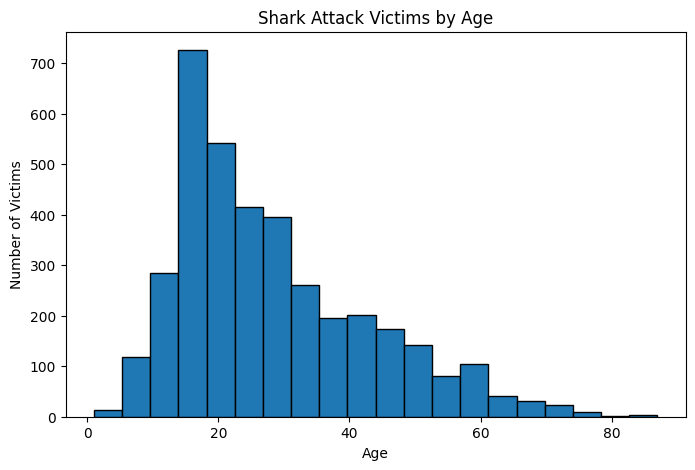

Most common age: 17.0


In [90]:
import matplotlib.pyplot as plt

print("Checking Age column...")
print(df['Age'].head(10))

df['Age_clean'] = df['Age']


df['Age_clean'] = pd.to_numeric(df['Age_clean'], errors='coerce')


df.loc[(df['Age_clean'] < 0) | (df['Age_clean'] > 120), 'Age_clean'] = None


print(f"Valid ages: {df['Age_clean'].notna().sum():,}")
print(f"Average age: {df['Age_clean'].mean():.1f}")


plt.figure(figsize=(8, 5))
plt.hist(df['Age_clean'].dropna(), bins=20, edgecolor='black')
plt.title('Shark Attack Victims by Age')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.show()

most_common_age = df['Age_clean'].mode().iloc[0] if not df['Age_clean'].mode().empty else None
print(f"Most common age: {most_common_age}")



In [91]:
df['Sex_clean'] = df['Sex'].astype(str).str.upper()

male_count = (df['Sex_clean'] == 'M').sum()
female_count = (df['Sex_clean'] == 'F').sum()

print("Male count:", male_count)
print("Female count:", female_count)
print("Proportion male:", round(male_count/(male_count+female_count)*100, 1), "%")

Male count: 4960
Female count: 753
Proportion male: 86.8 %


In [93]:
df['Type_clean'] = df['Type'].astype(str).str.upper().str.strip()

df['Type_clean'] = df['Type_clean'].replace({
    'UNPROVOKED': 'Unprovoked',
    'PROVOKED': 'Provoked'
})
df.loc[~df['Type_clean'].isin(['Unprovoked', 'Provoked']), 'Type_clean'] = 'Unknown'
type_counts = df['Type_clean'].value_counts()
print("Attack types:")
for attack_type, count in type_counts.items():
    print(f"  {attack_type}: {count}")
prop_unprovoked = type_counts['Unprovoked'] / type_counts.sum()
print(f"\nProportion unprovoked: {prop_unprovoked*100:.1f}%")

Attack types:
  Unprovoked: 4588
  Unknown: 1044
  Provoked: 603

Proportion unprovoked: 73.6%


In [94]:
df['Fatal_clean'] = df['Fatal Y/N'].astype(str).str.upper().str.strip()
df['Fatal_clean'] = df['Fatal_clean'].replace({
    'Y': 'Y', 'YES': 'Y',
    'N': 'N', 'NO': 'N'
})
df.loc[~df['Fatal_clean'].isin(['Y', 'N']), 'Fatal_clean'] = 'Unknown'

fatal_counts = df['Fatal_clean'].value_counts()
print("\nFatal outcomes:")
for outcome, count in fatal_counts.items():
    print(f"  {outcome}: {count}")



Fatal outcomes:
  N: 4585
  Y: 1101
  Unknown: 549


In [97]:
unprovoked = df[df['Type_clean'] == 'Unprovoked']
male_unprovoked = (unprovoked['Sex_clean'] == 'M').sum()
female_unprovoked = (unprovoked['Sex_clean'] == 'F').sum()
total_unprovoked_known = male_unprovoked + female_unprovoked

print("Unprovoked attacks by gender")
print(f"  Male: {male_unprovoked} ({male_unprovoked/total_unprovoked_known*100:.1f}%)")
print(f"  Female: {female_unprovoked} ({female_unprovoked/total_unprovoked_known*100:.1f}%)")
print(f"  Sharks are MORE likely to attack: {'MEN' if male_unprovoked > female_unprovoked else 'WOMEN'}")
print("Fatality rate by attack type")
for attack_type in ['Unprovoked', 'Provoked']:
    subset = df[df['Type_clean'] == attack_type]
    fatal_y = (subset['Fatal_clean'] == 'Y').sum()
    total_known = (subset['Fatal_clean'].isin(['Y', 'N'])).sum()
    if total_known > 0:
        rate = fatal_y / total_known * 100
        print(f"  {attack_type}: {rate:.1f}% fatal")
    else:
        print(f"  {attack_type}: No data")
print("Fatality rate by gender")
for gender in ['M', 'F']:
    subset = df[df['Sex_clean'] == gender]
    fatal_y = (subset['Fatal_clean'] == 'Y').sum()
    total_known = (subset['Fatal_clean'].isin(['Y', 'N'])).sum()
    if total_known > 0:
        rate = fatal_y / total_known * 100
        gender_name = 'Male' if gender == 'M' else 'Female'
        print(f"  {gender_name}: {rate:.1f}% fatal")
    else:
        print(f"  {gender}: No data")

print("My feelings about sharks is that they seem to not be as aggressive as one may think. Most attacks are not fatal. Sharks are just existing in their habitat.")

Unprovoked attacks by gender
  Male: 3801 (85.7%)
  Female: 635 (14.3%)
  Sharks are MORE likely to attack: MEN
Fatality rate by attack type
  Unprovoked: 20.6% fatal
  Provoked: 2.5% fatal
Fatality rate by gender
  Male: 19.8% fatal
  Female: 15.4% fatal
My feelings about sharks is that they seem to not be as aggressive as one may think. Most attacks are not fatal. Sharks are just existing in their habitat.


In [99]:
df.columns = df.columns.str.strip()
df['Species_clean'] = df['Species'].astype(str).str.lower()

white_shark_keywords = ['white', 'carcharodon', 'great white']
df['is_white_shark'] = df['Species_clean'].apply(
    lambda x: any(keyword in x for keyword in white_shark_keywords)
)

white_shark_count = df['is_white_shark'].sum()
total_attacks = len(df)

print(f"White shark attacks")
print(f"  White shark attacks: {white_shark_count}")
print(f"  Total attacks: {total_attacks}")
print(f"  Proportion: {white_shark_count/total_attacks*100:.1f}%")

White shark attacks
  White shark attacks: 731
  Total attacks: 6235
  Proportion: 11.7%


Complete answers for the shark attach file:

1. File opened.

2. Dropped empty columns.

3. Year variable cleaned:
   - Year range: 1900 to 2024
   - Attacks since 1940: 5,451
   - Trend analysis: Attacks are INCREASING over time

4. Age variable cleaned and histogram:
   - Valid ages found: 3,763
   - Average victim age: 28.3 years
   - Histogram created

5. Proportion of male victims:
   - Male victims: 4,960 (86.8%)
   - Female victims: 753 (13.2%)

6. Type variable cleaned:
   - Unprovoked attacks: 4,588 (73.6%)
   - Provoked attacks: 603
   - Unknown: 1,044

7. Fatal Y/N variable cleaned:
   - Y (Fatal): 1,101
   - N (Non-fatal): 4,585
   - Unknown: 549

8. Analysis:

   a) Unprovoked attacks by gender:
      - Male: 3,801 (85.7%)
      - Female: 635 (14.3%)
      - Sharks are MORE likely to launch unprovoked attacks on MEN

   b) Fatality rate by attack type:
      - Unprovoked attacks: 20.6% fatal
      - Provoked attacks: 2.5% fatal
      - Attacks are MORE likely to be fatal when UNPROVOKED

   c) Fatality rate by gender:
      - Male victims: 19.8% fatal
      - Female victims: 15.4% fatal
      - Attacks are MORE likely to be fatal when victim is MALE

   d) How I feel about sharks:
      Sharks seem to not be as aggressive as one may think. Most attacks are
      not fatal. Sharks are just existing in their habitat.

9. White shark attacks:
   - White shark attacks: 731
   - Total attacks: 6,235
   - Proportion: 11.7% of attacks are by white sharks

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about a way to organize data called tidy data. Basically, it is meant to configure datasets so taht they are easier to clean and analyze.
2. This paper was meant to make data cleaning faster, make data more consistent, and allow for different tools to work together more easily.
3. For quote 1, I would interpret it to mean that tidy datasets follow the same rules and messy datasets can be disorganized in a variety of ways. The family aspect of the quote makes me think that there is potentially some sort of similarity, as families do have basic similarities besides potential behavioral trait differences. For quote 2, I take this to mean that typically we can determine what data is trying to tell us, but it is not a one-size-fits-all approach because every dataset can be different and data's meaning is dependent on the context.
4. values--> the actual numbers or text in the data.
variables --> all the values that measure the same thing.
observations --> all the values collected from the same source.
5. each variable is a column, each observation is a row, each type of observation is in its own table
6. 5 most common problems in messy datasets:
- column headers are values, not variables
- multipel variables in one column
- variables in both rows and columns
- different observational types in the same table
- one observation type across many tables
Table 4 is messy because the column name is actually a value that should be its own column rather than spread across the top.
Melting means that columns are turned into rows to make the data more organized, but it also makes it longer.
7. 11 is messy because the temperature data is spread out across rows and columns. 12 is molten because it is in a long format and the rows are in separate columns.
8. The main problem is that tidy data requires tools to actually be useful, but the people who make the tools won't make it until people actually make their data tidy. So it is a back and forth that can be a hinderance. Wickham ultimately hopes that we can develop better systems to format data that builds on the concept of tidy data.


**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?